# Hazard curves calculation in openquake.hazardlib

In [1]:
%load_ext autoreload
%autoreload 2
import warnings; warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

from openquake.hazardlib.source import AreaSource
from openquake.hazardlib.mfd import TruncatedGRMFD
from openquake.hazardlib.scalerel import PointMSR, WC1994
from openquake.hazardlib.geo import Point, NodalPlane, Polygon
from openquake.hazardlib.pmf import PMF
from openquake.hazardlib.tom import PoissonTOM
from openquake.hazardlib.calc.hazard_curve import calc_hazard_curves
from openquake.hazardlib.site import Site, SiteCollection
from openquake.hazardlib.imt import PGA, SA
from openquake.hazardlib.gsim.campbell_bozorgnia_2008 import CampbellBozorgnia2008

import numpy
from matplotlib import pyplot

# Hazard curves from area sources with point and finite ruptures

In [3]:
# define area source with point ruptures
src1 = AreaSource(
    source_id='1',
    name='area',
    tectonic_region_type='Active Shallow Crust',
    mfd=TruncatedGRMFD(min_mag=5., max_mag=6.5, bin_width=0.2, a_val=4.45, b_val=1.),
    rupture_mesh_spacing=2.,
    magnitude_scaling_relationship=PointMSR(),
    rupture_aspect_ratio=1.,
    temporal_occurrence_model=PoissonTOM(50.),
    upper_seismogenic_depth=2.,
    lower_seismogenic_depth=12.,
    nodal_plane_distribution=PMF([(1, NodalPlane(strike=0., dip=50, rake=90.))]),
    hypocenter_distribution=PMF([(1, 7.)]),
    polygon=Point(0., 0.).to_polygon(200.),
    area_discretization=10.
)

In [4]:
# define area source with finite ruptures
src2 = AreaSource(
    source_id='1',
    name='area',
    tectonic_region_type='Active Shallow Crust',
    mfd=TruncatedGRMFD(min_mag=5., max_mag=6.5, bin_width=0.2, a_val=4.45, b_val=1.),
    rupture_mesh_spacing=2.,
    magnitude_scaling_relationship=WC1994(),
    rupture_aspect_ratio=1.,
    temporal_occurrence_model=PoissonTOM(50.),
    upper_seismogenic_depth=2.,
    lower_seismogenic_depth=12.,
    nodal_plane_distribution=PMF([(1, NodalPlane(strike=0, dip=50, rake=90))]),
    hypocenter_distribution=PMF([(1, 7.)]),
    polygon=Point(0., 0.).to_polygon(200.),
    area_discretization=10.
)

In [5]:
# compute hazard curve from src1
imls = [0.005, 0.007, 0.0098, 0.0137, 0.0192, 0.0269, 0.0376, 0.0527, 0.0738, 0.103, 0.145,
        0.203, 0.284, 0.397, 0.556, 0.778, 1.09, 1.52, 2.13]
curves1 = calc_hazard_curves(
    groups=[src1],
    ss_filter=SiteCollection([Site(location=Point(0., 0.), vs30=760., vs30measured=True, z1pt0=40., z2pt5=1.)]),
    imtls={'PGA': imls},
    gsim_by_trt={'Active Shallow Crust': CampbellBozorgnia2008()},
    truncation_level=None
)

In [6]:
# compute hazard curve from src2
curves2 = calc_hazard_curves(
    groups=[src2],
    ss_filter=SiteCollection([Site(location=Point(0., 0.), vs30=760., vs30measured=True, z1pt0=40., z2pt5=1.)]),
    imtls={'PGA': imls},
    gsim_by_trt={'Active Shallow Crust': CampbellBozorgnia2008()},
    truncation_level=None
)

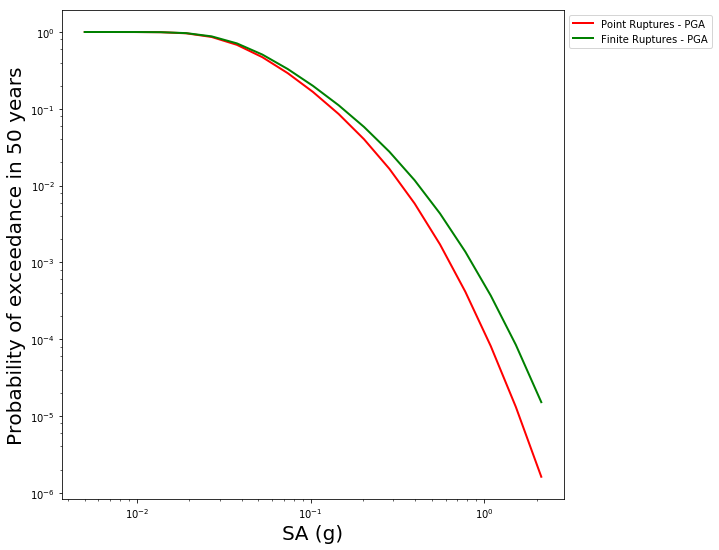

In [7]:
fig = pyplot.figure(figsize=(9, 9))
pyplot.loglog(imls, curves1['PGA'][0], '-r', linewidth=2, label='Point Ruptures - PGA')
pyplot.loglog(imls, curves2['PGA'][0], '-g', linewidth=2, label='Finite Ruptures - PGA')
pyplot.legend(loc="upper left", bbox_to_anchor=(1,1))
pyplot.xlabel('SA (g)', fontsize=20)
pyplot.ylabel('Probability of exceedance in 50 years', fontsize=20)

# Hazard curves from area sources with different nodal planes

In [8]:
# define area source with vertical strike-slip ruptures
src1 = AreaSource(
    source_id='1',
    name='area',
    tectonic_region_type='Active Shallow Crust',
    mfd=TruncatedGRMFD(min_mag=5., max_mag=6.5, bin_width=0.2, a_val=4.45, b_val=1.),
    rupture_mesh_spacing=2.,
    magnitude_scaling_relationship=WC1994(),
    rupture_aspect_ratio=1.,
    temporal_occurrence_model=PoissonTOM(50.),
    upper_seismogenic_depth=2.,
    lower_seismogenic_depth=12.,
    nodal_plane_distribution=PMF([(1, NodalPlane(strike=0., dip=90, rake=0.))]),
    hypocenter_distribution=PMF([(1, 7.)]),
    polygon=Point(0., 0.).to_polygon(200.),
    area_discretization=10.
)

In [9]:
# define area source with dipping (50 degrees) reverse ruptures
src2 = AreaSource(
    source_id='1',
    name='area',
    tectonic_region_type='Active Shallow Crust',
    mfd=TruncatedGRMFD(min_mag=5., max_mag=6.5, bin_width=0.2, a_val=4.45, b_val=1.),
    rupture_mesh_spacing=2.,
    magnitude_scaling_relationship=WC1994(),
    rupture_aspect_ratio=1.,
    temporal_occurrence_model=PoissonTOM(50.),
    upper_seismogenic_depth=2.,
    lower_seismogenic_depth=12.,
    nodal_plane_distribution=PMF([(1, NodalPlane(strike=0, dip=50, rake=90))]),
    hypocenter_distribution=PMF([(1, 7.)]),
    polygon=Point(0., 0.).to_polygon(200.),
    area_discretization=10.
)

In [10]:
# compute hazard curve from src1
imls = [0.005, 0.007, 0.0098, 0.0137, 0.0192, 0.0269, 0.0376, 0.0527, 0.0738, 0.103, 0.145,
        0.203, 0.284, 0.397, 0.556, 0.778, 1.09, 1.52, 2.13]
curves1 = calc_hazard_curves(
    groups=[src1],
    ss_filter=SiteCollection([Site(location=Point(0., 0.), vs30=760., vs30measured=True, z1pt0=40., z2pt5=1.)]),
    imtls={'PGA': imls},
    gsim_by_trt={'Active Shallow Crust': CampbellBozorgnia2008()},
    truncation_level=None
)

In [11]:
# compute hazard curve from src2
curves2 = calc_hazard_curves(
    groups=[src2],
    ss_filter=SiteCollection([Site(location=Point(0., 0.), vs30=760., vs30measured=True, z1pt0=40., z2pt5=1.)]),
    imtls={'PGA': imls},
    gsim_by_trt={'Active Shallow Crust': CampbellBozorgnia2008()},
    truncation_level=None
)

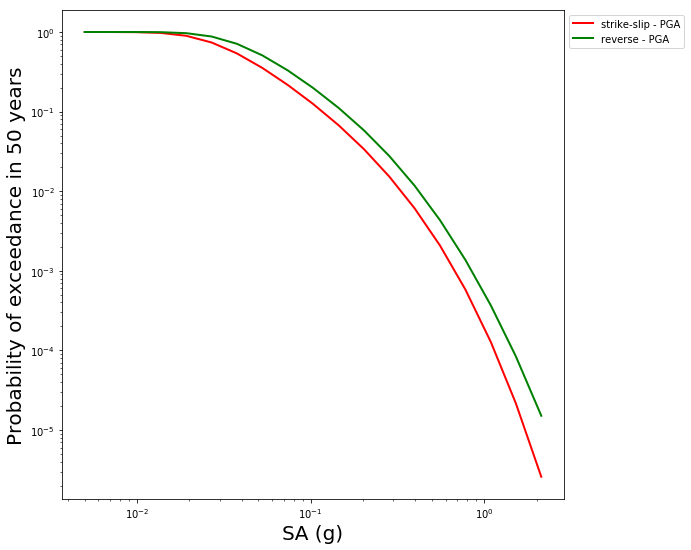

In [12]:
fig = pyplot.figure(figsize=(9, 9))
pyplot.loglog(imls, curves1['PGA'][0], '-r', linewidth=2, label='strike-slip - PGA')
pyplot.loglog(imls, curves2['PGA'][0], '-g', linewidth=2, label='reverse - PGA')
pyplot.legend(loc="upper left", bbox_to_anchor=(1,1))
pyplot.xlabel('SA (g)', fontsize=20)
pyplot.ylabel('Probability of exceedance in 50 years', fontsize=20)